# Credit Card Default
Code to accompany Lecture on  
Regression  
Jiaming Mao (<jmao@xmu.edu.cn>)  
<https://jiamingmao.github.io>  
credit: Warmenhoven, J. (https://github.com/JWarmenhoven/ISLR-python)

In [91]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-white')

In [62]:
# Read data
data = pd.read_csv('Default.csv') 
data.student = data.student.factorize()[0] #code student into {0,1}
data.default = data.default.factorize()[0] #code default into {0,1}
data.head(3)

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895


## Visualize Data

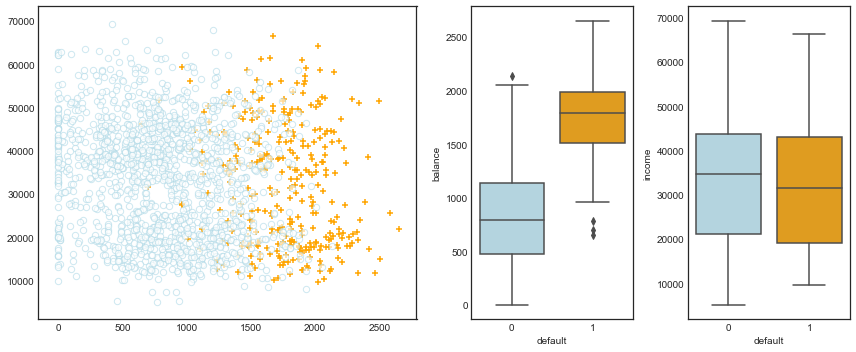

In [66]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

no = data[data.default==0].sample(frac=0.15) #a fraction of'no' obs
yes = data[data.default==1] #all "yes" obs
d = no.append(yes)

ax1.scatter(d[d.default==1].balance, d[d.default==1].income, s=40, c='orange', marker='+',
            linewidths=1) #income-balance plot for "yes" obs
ax1.scatter(d[d.default==0].balance, d[d.default==0].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6) #income-balance plot for "no" obs

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('default', 'balance', data=d, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=d, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

## Logistic Regression
### Default on income and student 

In [80]:
y = data.default
X = sm.add_constant(data[['balance', 'income', 'student']])
est = smf.Logit(y, X).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


### Default on balance

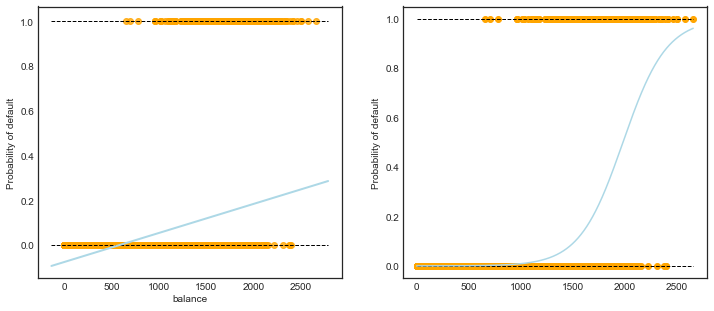

In [88]:
X = data.balance.values.reshape(-1,1) 
xx = np.arange(data.balance.min(), data.balance.max()).reshape(-1,1)

clf = LogisticRegression()
clf.fit(X,y)
prob = clf.predict_proba(xx)

# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.regplot(data.balance, y2, ci=None, scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
ax2.scatter(X_train, y2, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')
for ax in fig.axes:
    xrange = ax.xaxis.get_data_interval()
    ax.hlines(0, xmin=xrange[0], xmax=xrange[1], linestyles='dashed', lw=1)
    ax.hlines(1, xmin=xrange[0], xmax=xrange[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')


### Default on balance by student

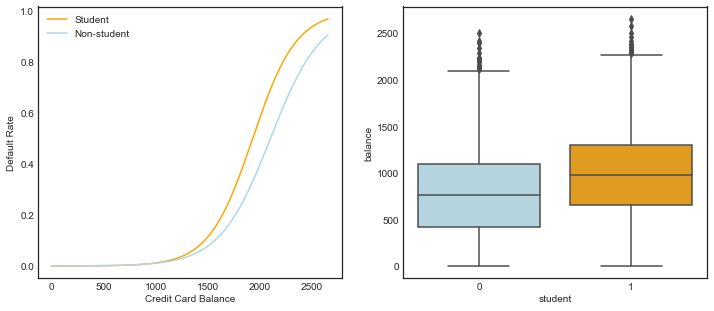

In [93]:
X0 = X[data.student==0]
y0 = y[data.student==0]
X1 = X[data.student==1]
y1 = y[data.student==1]

clf0 = LogisticRegression()
clf1 = LogisticRegression()
clf0.fit(X0,y0)
clf1.fit(X1,y1)
prob0 = clf0.predict_proba(xx)
prob1 = clf1.predict_proba(xx)

# plot
## left
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(xx, pd.DataFrame(prob0)[1], color='orange', label='Student')
ax1.plot(xx, pd.DataFrame(prob1)[1], color='lightblue', label='Non-student')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.legend(loc=2)
## right
sns.boxplot('student', 'balance', data=data, orient='v', ax=ax2,  palette=c_palette);